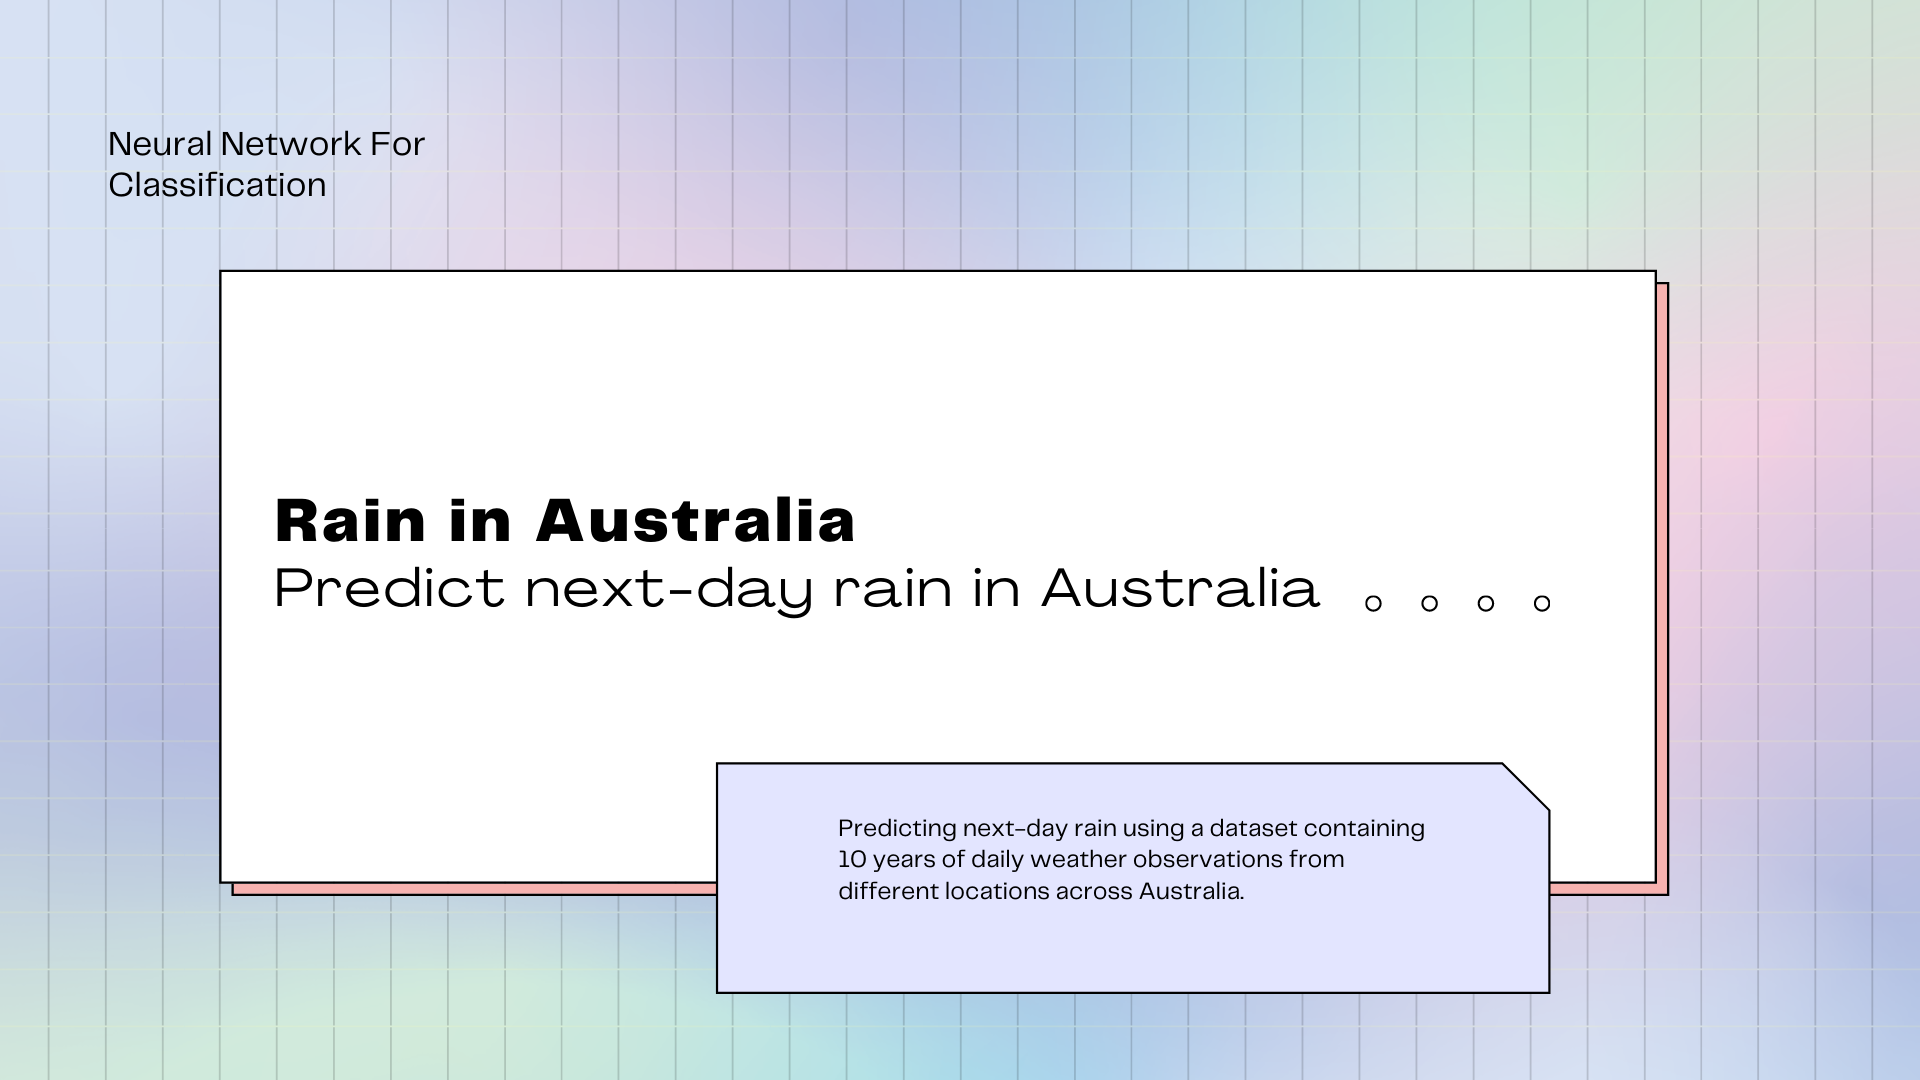

In [1]:
from pathlib import Path
Path("D:/libraries/Rain pridiction").mkdir(parents=True,exist_ok=True)
import PIL 
from PIL import Image
PIL.Image.open('D:/libraries/Rain pridiction/rain start.png')

# Table of contents

*1. IMPORTING LIBRARIES*

*2. LOADING DATA*

*3. DATA VISUALIZATION AND CLEANINGS*

*4. DATA PREPROCESSING*

*5. MODEL BUILDING*

*6. CONCLUSION*

*7. END*

- About the dataset





   # Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.random.seed(0)


Bad key text.latex.preview in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\211BN\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

## Loading data

In [3]:
data =pd.read_csv('D:/libraries/Rain pridiction/weatherAUS.csv',encoding='latin=1')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**About the data**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.shape

(145460, 23)

In [7]:
data.ndim

2

- points to notes
    1. There are missing value in dataset
    2. Dataset includes numeric and categorical values

### DATA VISUALIZATION AND CLEANING

**Steps involves in this section:**

   - Count plot of target column
   - Correlation amongst numeric attributes
   - Parse Dates into datetime
   - Encoding days and months as continuous cyclic features


In [8]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
ob =(data.dtypes=='object')
object_col =list(ob[ob].index)
print("the object type data are:",object_col)

the object type data are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

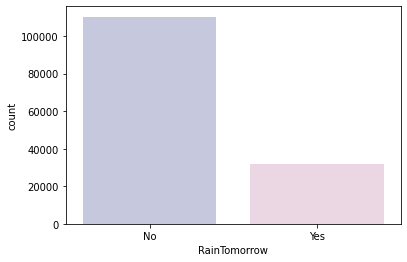

In [10]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols=["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

<AxesSubplot:>

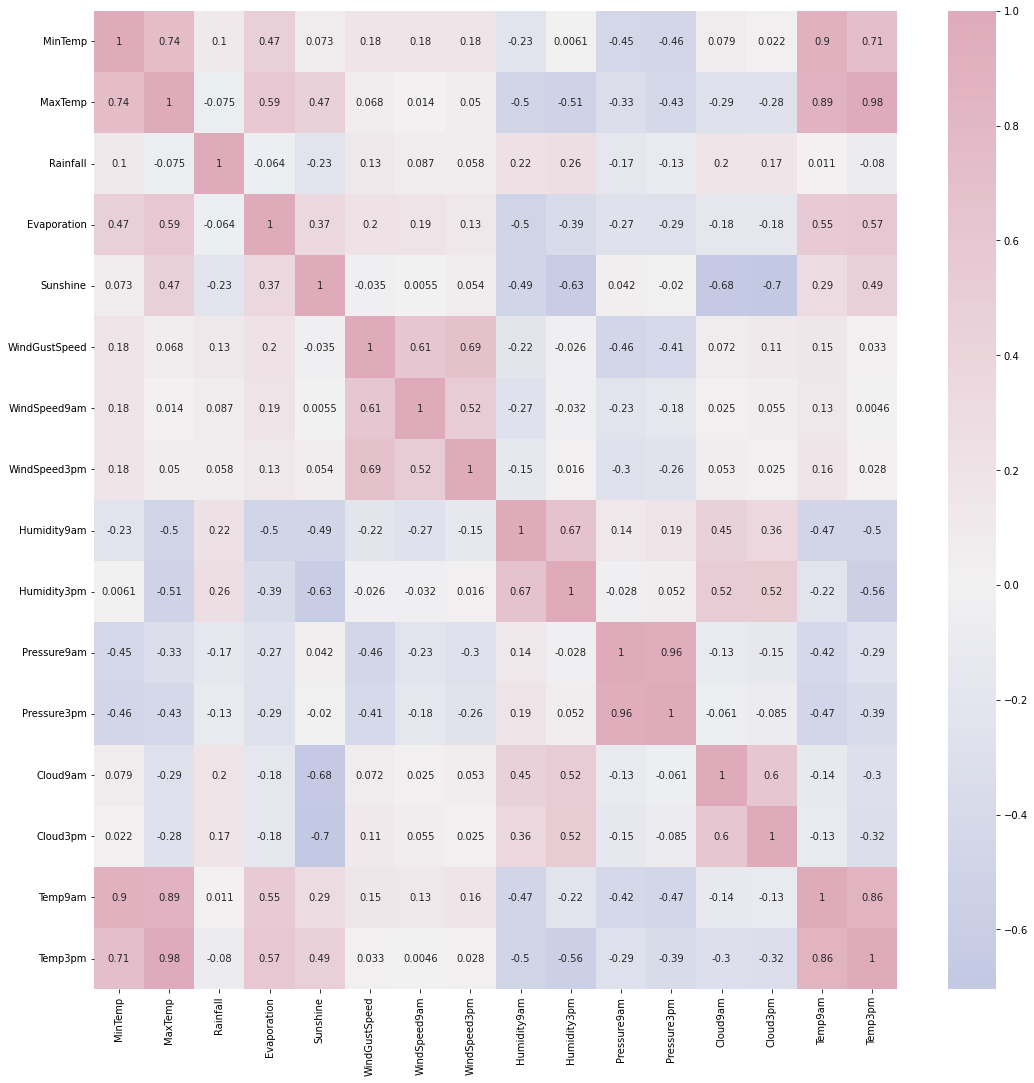

In [11]:
# Correlation amongst numeric attributes
plt.subplots(figsize=(18,18))
cmap =sns.diverging_palette(260,-10,s=50,l=75,n=6,as_cmap=True)
sns.heatmap(data.corr(),annot=True,cmap=cmap,center=0)

**Now I will parse Dates into datetime**

In [12]:
date =data['Date'].str.len()
date.value_counts()

10    145460
Name: Date, dtype: int64

In [13]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date'] =pd.to_datetime(data['Date'])
data['Date']
# creating a year columns
data['Year']=data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data,col,max_col):
    data[col+"_sin"]=np.sin(2*np.pi*data[col]/max_col)
    data[col+"_cos"]=np.cos(2*np.pi*data[col]/max_col)
    return data

# month column
data['Month']=data.Date.dt.month
data=encode(data,'Month',12)

# day columns
data['Day']=data.Date.dt.day
data = encode(data,'Day',31)

In [14]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


In [15]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Month_sin',
       'Month_cos', 'Day', 'Day_sin', 'Day_cos'],
      dtype='object')

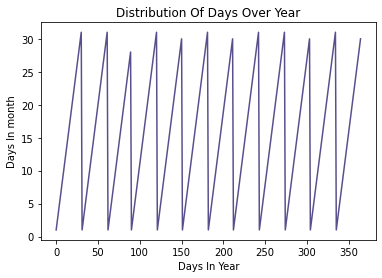

In [16]:
# roughly a year's span section 
year_span =data[:365]
year_span['Day'].plot(color='#58508d')
plt.title("Distribution Of Days Over Year")
plt.ylabel("Days In month")
plt.xlabel("Days In Year")
plt.show()



As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature.

Text(0.5, 0, 'Sine Encoded Months')

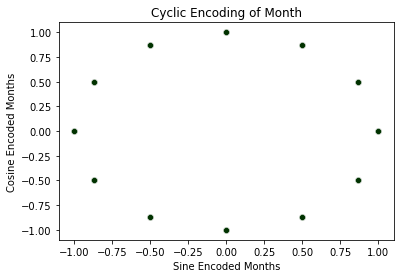

In [17]:
# cyclic month
cyclic_month = sns.scatterplot(x="Month_sin",y="Month_cos",data=data, color="#013200")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

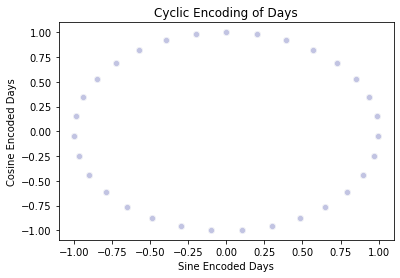

In [18]:
# cyclic days
cyclic_days=sns.scatterplot(x='Day_sin',y= 'Day_cos',data=data,color='#C2C4E2')
cyclic_days.set_title("Cyclic Encoding of Days")
cyclic_days.set_ylabel("Cosine Encoded Days")
cyclic_days.set_xlabel("Sine Encoded Days")
plt.show()



Next, I will deal with missing values in categorical and numeric attributes separately



- Categorial variables

In [19]:
ob =data.dtypes=='object'
object_col =list(ob[ob].index)
print('the categorial values are',object_col)

the categorial values are ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
# null values
for i in object_col:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [21]:
# Missing values in categorical variables
for i in object_col:
    null_data=data[i].isna().sum()/len(data)*100
    if null_data>0:
        print("{} the null rate: {}%".format(i,round(null_data,2)))

WindGustDir the null rate: 7.1%
WindDir9am the null rate: 7.26%
WindDir3pm the null rate: 2.91%
RainToday the null rate: 2.24%
RainTomorrow the null rate: 2.25%


These columns have most missing data __Sunshine__ **,** __Evaporation__ **,** __Cloud9am__ *and* __Cloud3pm__
there null values exceeded __35 %__

__Numerical variables__

In [22]:
# numercial values
num = data.dtypes=="float64"
num_col =list(num[num].index)
print("the numerical values are:",num_col)

the numerical values are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']


In [23]:
for i in num_col:
    print(i,": ",data[i].isna().sum())

MinTemp :  1485
MaxTemp :  1261
Rainfall :  3261
Evaporation :  62790
Sunshine :  69835
WindGustSpeed :  10263
WindSpeed9am :  1767
WindSpeed3pm :  3062
Humidity9am :  2654
Humidity3pm :  4507
Pressure9am :  15065
Pressure3pm :  15028
Cloud9am :  55888
Cloud3pm :  59358
Temp9am :  1767
Temp3pm :  3609
Month_sin :  0
Month_cos :  0
Day_sin :  0
Day_cos :  0


In [24]:
# Filling missing values with median of the column in value

for i in num_col:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

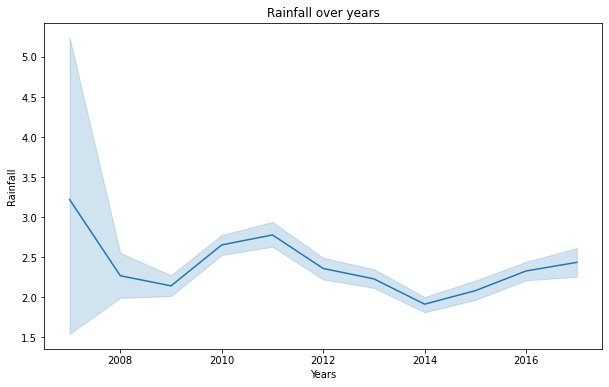

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='Year',y='Rainfall')
plt.title('Rainfall over years')
plt.xlabel('Years')
plt.show()

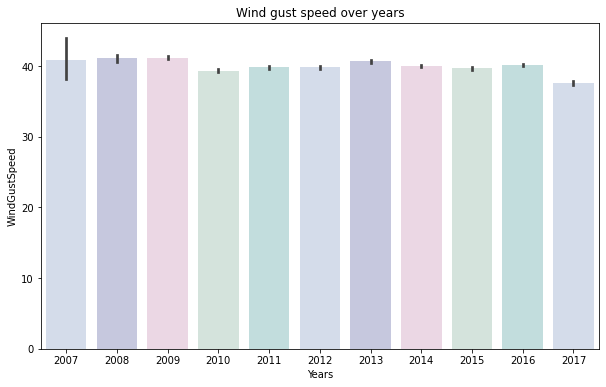

In [26]:
plt.figure(figsize=(10,6))
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
sns.barplot(data=data,x='Year',y='WindGustSpeed',palette=colours)
plt.title('Wind gust speed over years')
plt.xlabel('Years')
plt.show()

## Data Processing

__Steps involved in Data Preprocessing:__

   - Label encoding columns with categorical data
   - Perform the scaling of the features
   - Detecting outliers
   - Dropping the outliers based on data analysis


__Label encoding the catagorical varable__






In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in object_col:
    data[i] = lb.fit_transform(data[i])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,21.8,0,0,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,24.3,0,0,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,23.2,0,0,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,26.5,0,0,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,29.7,0,0,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Prepairing attributes of scale data
features=data.copy()
features = data.drop(['RainTomorrow', 'Date','Day', 'Month'], axis=1)

target = data['RainTomorrow']

# dropping target and extra columns
col_names = list(features.columns)
scaler=preprocessing.StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features,columns=col_names)
print('All features are now scaled')

All features are now scaled


In [29]:
print("Dataframe to be used for further modelling:")
features.head()

Dataframe to be used for further modelling:


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month_sin,Month_cos,Day_sin,Day_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,0.944029,0.307739,1.027318,1.265374,...,1.464068,0.137693,-0.013506,0.019135,-0.53986,-1.879575,-0.016425,1.434192,0.278970,1.426023
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.145167,0.307739,-0.394948,1.476352,...,0.149133,0.137693,0.033011,0.384064,-0.53986,-1.879575,-0.016425,1.434192,0.549587,1.339551
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.346306,0.460168,1.027318,1.476352,...,0.149133,-1.286294,0.622225,0.223495,-0.53986,-1.879575,-0.016425,1.434192,0.797572,1.199371
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.866215,-1.216548,0.214594,-1.688306,...,0.149133,0.137693,0.172562,0.705202,-0.53986,-1.879575,-0.016425,1.434192,1.012774,1.011221
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,0.944029,0.079096,-1.410853,-0.211466,...,1.025756,1.561680,0.126045,1.172312,-0.53986,-1.879575,-0.016425,1.434192,1.186382,0.782805


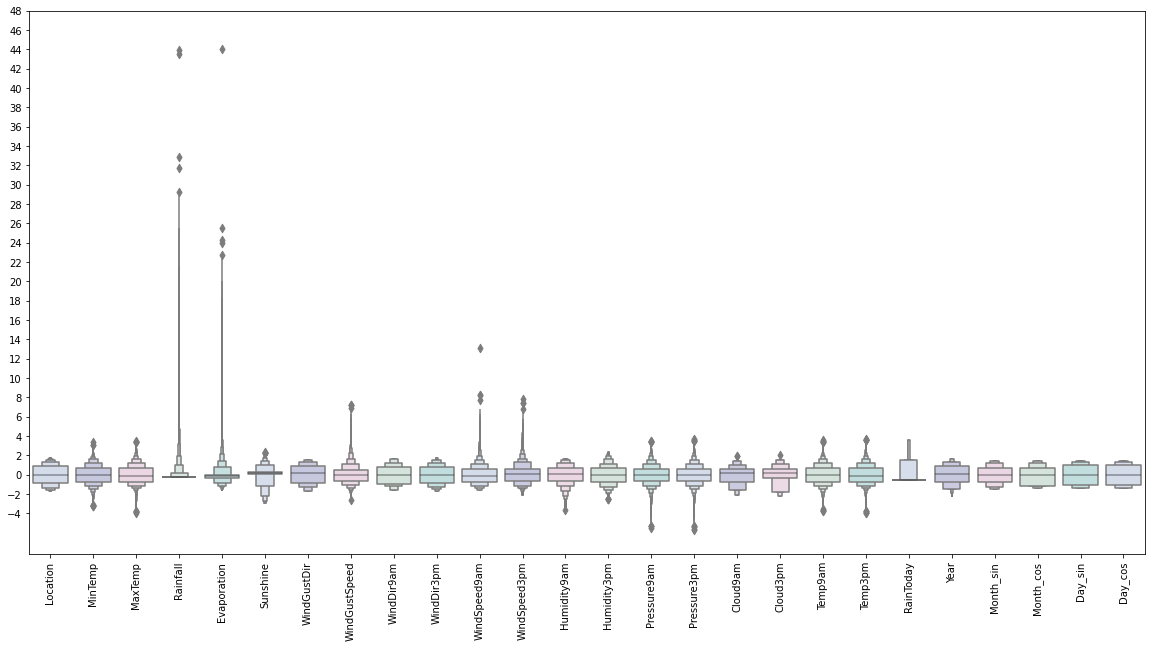

In [30]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data=features,palette=colours)
plt.xticks(rotation=90)
plt.yticks(range(-4,50,2))
plt.show()

Outliers present in *Rainfall* , *Evaporation* , *Windspeeds* ,*pressure* , *WindGustSpeed*

In [31]:
# fit data

features =features[(features["MinTemp"]<2.5) & (features["MinTemp"]>-2.5)]
features =features[(features["MaxTemp"]<2.5) & (features["MaxTemp"]>-2.5)]
features =features[(features["Rainfall"]<4.5)]
features =features[(features["Evaporation"]<2.8)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features =features[(features["Sunshine"]<2.5)]
features =features[(features["WindSpeed9am"]<4)]
features =features[(features["WindSpeed3pm"]<3)]
features =features[(features["Humidity9am"]>-3)]
features =features[(features["Humidity3pm"]>-3)]
features =features[(features["Pressure9am"]<3) & (features["Pressure9am"]>-2.5)]
features =features[(features["Pressure3pm"]<3) & (features["Pressure3pm"]>-2.5)]
features =features[(features["Temp3pm"]<2.3) & (features["Temp3pm"]>-2)]
features =features[(features["Temp9am"]<2.3) & (features["Temp9am"]>-2)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]

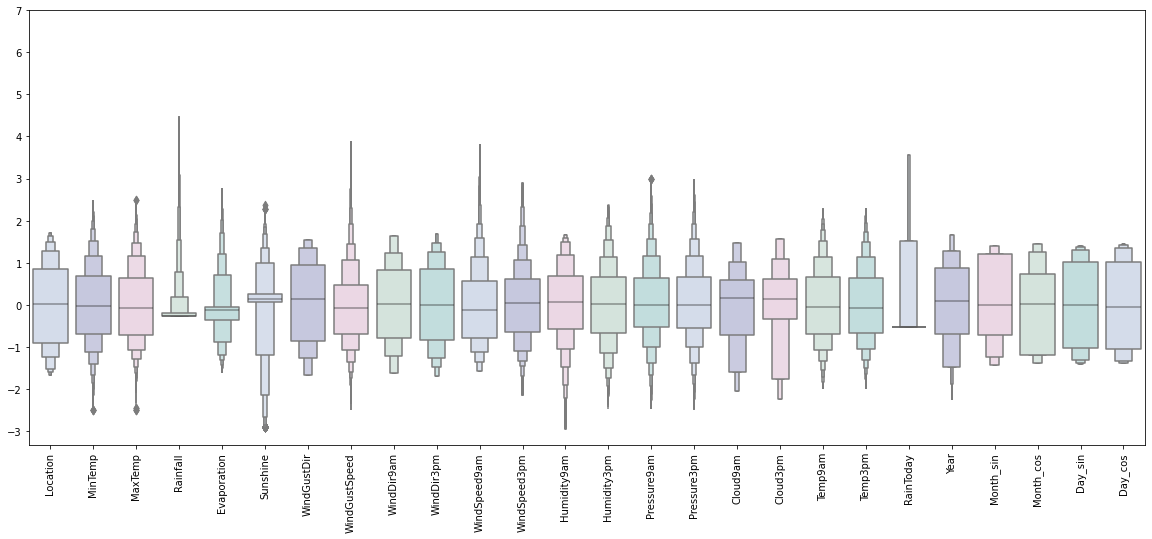

In [32]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,8))
sns.boxenplot(data=features,palette=colours)
plt.xticks(rotation=90)
plt.yticks(range(-3,8,1))
plt.show()

## MODEL BUILDING

In [33]:
from sklearn.model_selection import train_test_split
feature=data.drop(['Date','Day', 'Month'], axis=1)
x = feature.drop(["RainTomorrow"], axis=1)
y = feature["RainTomorrow"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.6,random_state=100)

In [34]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
lr.coef_

array([ 5.07300368e-05, -4.84598446e-03,  2.58388868e-03, -2.07913706e-03,
        3.79111716e-03, -1.67462307e-02,  3.45756216e-03,  6.78709466e-03,
       -1.71168791e-03,  1.41431505e-03,  8.17855367e-05, -3.84452969e-03,
       -1.15221751e-03,  8.50138829e-03,  2.39015819e-02, -3.15833975e-02,
       -6.84335934e-04,  1.21314390e-02, -2.25373881e-03,  6.00249852e-03,
        2.97412462e-01,  2.30052773e-03, -4.29626534e-03, -1.89982030e-02,
        3.49298654e-03,  2.24058835e-07])

<AxesSubplot:xlabel='RainTomorrow'>

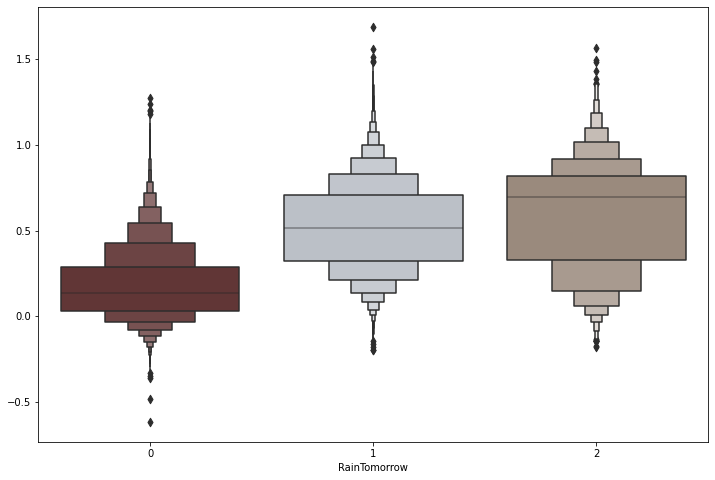

In [36]:
plt.subplots(figsize=(12,8))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
y_pred =lr.predict(x_test)
sns.boxenplot(x=y_test,y=y_pred,palette=pal)

In [37]:
y_pred = y_pred>0.3

<AxesSubplot:>

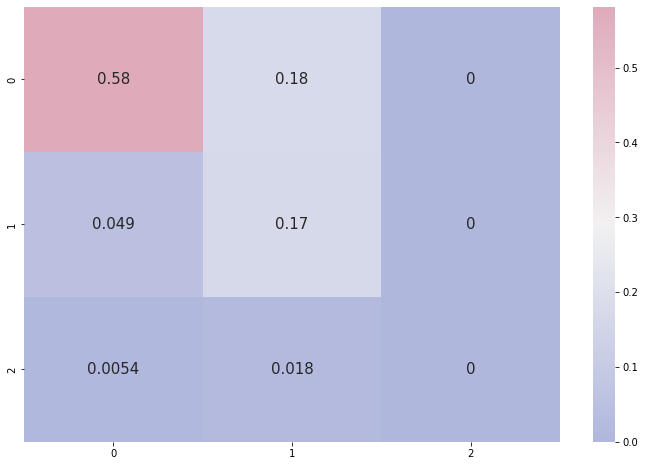

In [38]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83     66131
           1       0.47      0.78      0.58     19148
           2       0.00      0.00      0.00      1997

    accuracy                           0.75     87276
   macro avg       0.46      0.51      0.47     87276
weighted avg       0.80      0.75      0.76     87276



C:\Users\211BN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\211BN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\211BN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# error
from sklearn import metrics
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error: 0.25419359274027226
Mean squared error: 0.2649181905678537
Root mean squared error: 0.5147020405709052


In [41]:
# coffecient of data
coffecient =pd.DataFrame(lr.coef_,x.columns)
coffecient.columns =['Coffecient']
coffecient

,Coffecient
Location,5.073004e-05
MinTemp,-4.845984e-03
MaxTemp,2.583889e-03
Rainfall,-2.079137e-03
Evaporation,3.791117e-03
Sunshine,-1.674623e-02
WindGustDir,3.457562e-03
WindGustSpeed,6.787095e-03
WindDir9am,-1.711688e-03
WindDir3pm,1.414315e-03


# *END*

   ![](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png “Python Logo”)